In [30]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

##  Setup Graph with Traffic Data

In [11]:
# Create a city road network graph (example)
G = nx.grid_2d_graph(5, 5)  # 5x5 city grid (simplified)

In [12]:
display(G)

In [13]:
# Assign random traffic data to each node (speed, flow, etc.)
np.random.seed(42)
traffic_data = {node: np.random.randint(10, 100) for node in G.nodes}

In [14]:
# Store traffic data in node attributes
nx.set_node_attributes(G, traffic_data, "traffic")

## Generate Missing Data (Random or Structured)

In [22]:
# Define missingness pattern (percentage of missing nodes)
missing_rate = 0.2  # 20% of nodes will have missing data
num_missing = int(missing_rate * len(G.nodes))

In [31]:
# Randomly select nodes to be missing
missing_nodes = random.sample(list(G.nodes), num_missing)

In [32]:
# Assign missing values (e.g., NaN)
for node in missing_nodes:
    G.nodes[node]["traffic"] = np.nan

In [33]:
print(f"Missing Data Introduced at Nodes: {missing_nodes}")

Missing Data Introduced at Nodes: [(0, 4), (4, 0), (3, 2), (3, 0), (1, 2)]


## Visualize the Graph with Missing Data


In [35]:
# Get traffic values (color code missing data)
node_colors = [
    "red" if np.isnan(G.nodes[node]["traffic"]) else "blue" for node in G.nodes
]

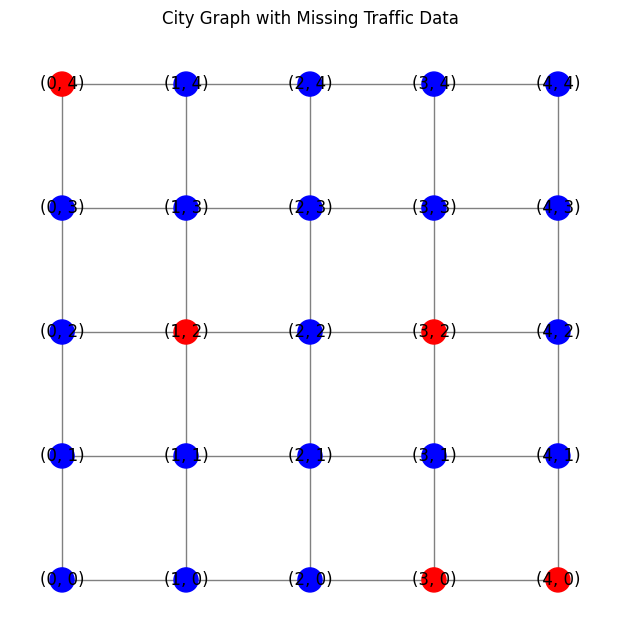

In [36]:
# Plot city traffic graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos={node: node for node in G.nodes()}, with_labels=True, 
        node_color=node_colors, node_size=300, edge_color="gray")
plt.title("City Graph with Missing Traffic Data")
plt.show()